In [6]:
## Import relevant libraries
import sys
import os
import shutil
from natsort import natsorted  # For natural sorting
sys.path.append('../../activedrops')

## Including ourselves
import quadrop as qd
qd.set_plotting_style()

import glob
import imageio
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt


In [7]:
data_path = "../../data/032424-k401-kif3-mixed-heated-1in5DNAstockconc/concatenated/"

# let's declare the variable "conditions" to the sorted list of subdirectories from data_path
conditions = natsorted([f for f in os.listdir(data_path) if os.path.isdir(os.path.join(data_path, f))])[:-1:]

# let's declare the variable "subconditions" to the sorted list of subdirectories from the first condition
subconditions = natsorted([f for f in os.listdir(os.path.join(data_path, conditions[0])) if os.path.isdir(os.path.join(data_path, conditions[0], f))])

conditions, subconditions
# qd.reorgTiffsToOriginal(data_path, conditions, subconditions)

(['k401', 'kif3'], ['Pos1'])

In [3]:
conditions = conditions[:1] + conditions[2:]
conditions

['k401', 'kif3']

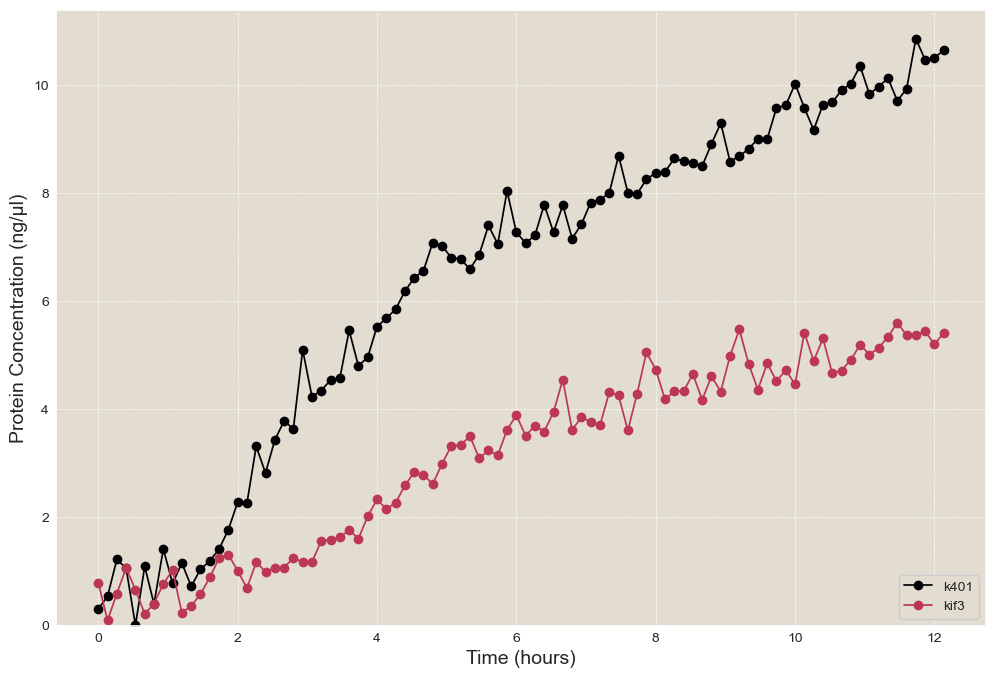

In [4]:
# channel info
channel = "gfp"
min_frame = 0
max_frame = None
skip_frames=8
time_intervals = [60] * len(conditions)

# Call the function with the updated parameters
qd.plot_fluorescence(
    data_path=data_path,
    conditions=conditions,
    subconditions=subconditions,
    channel=channel,
    time_intervals=time_intervals,  
    min_frame=min_frame,
    max_frame=max_frame,
    skip_frames=skip_frames,
    line_slope=0.00042, 
    line_intercept=0.00159-0.0001,
    log_scale=False,  # Set log_scale to True
    timescale="h",
    averaged=True
)

In [5]:
# frame info
min_frame = 0
max_frame = None
skip_frames=4
frame_rate=30

# channel info
channel = "cy5"
vmax = 0.2


qd.single_fluorescence_movies(data_path, conditions, subconditions[1:], channel, time_intervals, min_frame, max_frame, vmax, skip_frames, frame_rate, )

No images found for video creation.
No images found for video creation.


In [ ]:
figsize=(12, 6)


qd.grid_heatmaps(data_path, conditions, subconditions[:1], "cy5", frame_rate=frame_rate, figsize=figsize)